In [1]:
# 11.1 Cross-Validating Models

from sklearn import datasets
import numpy as np
from sklearn import metrics
from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

digits = datasets.load_digits()

features = digits.data
target = digits.target
standardizer = StandardScaler()
logistic = LogisticRegression()
pipeline = make_pipeline(standardizer, logistic)
kf = KFold(n_splits=10, shuffle=True, random_state=42)
cv_results = cross_val_score(
    pipeline,
    features,
    target,
    cv=kf,
    scoring='accuracy',
    n_jobs=-1)

cv_results.mean()

0.96548417132216

In [2]:
# 11.2 Creating a Baseline Regression Model

# Load libraries
from sklearn.datasets import load_boston
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
# Load data
boston = load_boston()

features = boston.data
target = boston.target

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)
dummy = DummyRegressor(strategy='mean')

dummy.fit(features_train, target_train)
dummy.score(features_test, target_test)

-0.001119359203955339

In [3]:
# 11.3 Creating a Baseline Classification Model
from sklearn.dummy import DummyClassifier
iris = datasets.load_iris()

features = iris.data
target = iris.target

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=0)

dummy_clf = DummyClassifier(strategy='uniform', random_state=1)

dummy_clf.fit(features_train, target_train)

dummy_clf.score(features_test, target_test)

0.42105263157894735

In [4]:
# 11.4 Evaluating Binary Classifier Predictions

from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=10000,
    n_features= 3,
    n_informative=3,
    n_redundant=0,
    n_classes=2,
    random_state=1
)

cross_val_score(logistic, X, y, scoring='accuracy', cv= 3)



array([0.95170966, 0.9579958 , 0.95559556])

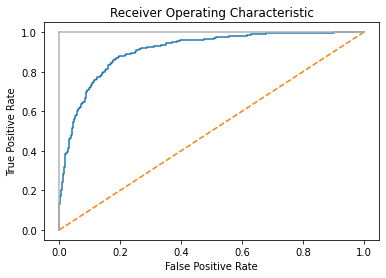

In [5]:
# 11.5 Evaluating Binary Classifier Thresholds


import matplotlib.pyplot as plt

from sklearn.metrics import roc_curve, roc_auc_score


features, target = make_classification(n_samples=10000,
                                        n_features=10,
                                        n_classes=2,
                                        n_informative=3,
                                        random_state=3)
# Split into training and test sets
features_train, features_test, target_train, target_test = train_test_split(
features, target, test_size=0.1, random_state=1)

logistic.fit(features_train, target_train)

target_proba = logistic.predict_proba(features_test)[:,1]

false_positive_rate, true_positive_rate, threshold = roc_curve(target_test,
target_proba)
# Plot ROC curve
plt.title("Receiver Operating Characteristic")
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel("True Positive Rate")
plt.xlabel("False Positive Rate")
plt.show()

In [6]:
# 11.6 Evaluating Multiclass Classifier Predictions

features, target = make_classification(n_samples = 10000,
n_features = 3,
n_informative = 3,
n_redundant = 0,
n_classes = 3,
random_state = 1)
# Create logistic regression
logit = LogisticRegression()
# Cross-validate model using accuracy
cross_val_score(logit, features, target, scoring='accuracy')

array([0.841 , 0.829 , 0.8265, 0.8155, 0.82  ])

c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


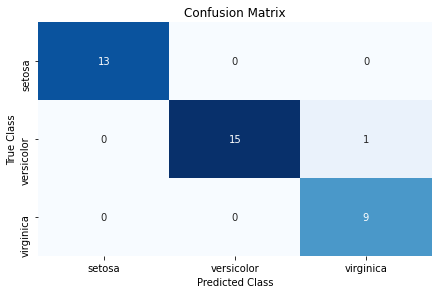

In [14]:
# 11.7 Visualizing a Classifier’s Performance


import seaborn as sns
from sklearn.metrics import confusion_matrix
import pandas as pd

iris = datasets.load_iris()

features = iris.data
target = iris.target

class_names = iris.target_names

features_train, features_test, target_train, target_test = train_test_split(features, target,random_state=1)

clf = LogisticRegression()

target_predicted = clf.fit(features_train,
target_train).predict(features_test)
matrix = confusion_matrix(target_test, target_predicted)
dataframe = pd.DataFrame(matrix, index=class_names, columns=class_names)
# Create heatmap
sns.heatmap(dataframe, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

In [16]:
# 11.8 Evaluating Regression Models
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression

# Generate features matrix, target vector
features, target = make_regression(n_samples = 100,
                                    n_features = 3,
                                    n_informative = 3,
                                    n_targets = 1,
                                    noise = 50,
                                    coef = False,
                                    random_state = 1)
# Create a linear regression object
ols = LinearRegression()
# Cross-validate the linear regression using (negative) MSE
cross_val_score(ols, features, target, scoring='neg_mean_squared_error')

array([-1974.65337976, -2004.54137625, -3935.19355723, -1060.04361386,
       -1598.74104702])

In [18]:

# 11.9 Evaluating Clustering Models
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Generate feature matrix
features, _ = make_blobs(n_samples = 1000,
                        n_features = 10,
                        centers = 2,
                        cluster_std = 0.5,
                        shuffle = True,
                        random_state = 1)

k_means = KMeans(n_clusters=2, random_state=1)

k_means.fit(features)
target_predicted = k_means.labels_
# Evaluate model
silhouette_score(features, target_predicted)

0.8916265564072142

In [21]:

# 11.10 Creating a Custom Evaluation Metric

from sklearn.metrics import make_scorer, r2_score

from sklearn.linear_model import Ridge

features, target = make_regression(
    n_samples=100,
    n_features=3,
    random_state=1
)

features_train, features_test, target_train, target_test = train_test_split(features, target, random_state=1)

regressor = Ridge()


def custom_metric(target_test, target_predicted):
    # Calculate r-squared score
    r2 = r2_score(target_test, target_predicted)
    # Return r-squared score
    return r2


score = make_scorer(custom_metric, greater_is_better=True)

# Train ridge regression model
model = regressor.fit(features_train, target_train)
# Apply custom scorer
score(model, features_test, target_test)

0.9997101302328583

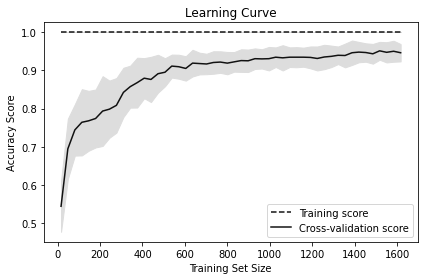

In [22]:
# 11.11 Visualizing the Effect of Training Set Size

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve

digits = load_digits()

features = digits.data
target = digits.target

train_sizes, train_scores, test_scores = learning_curve(
    RandomForestClassifier(),
    features,
    target,
    cv=10,
    scoring='accuracy',
    n_jobs=-1,
    train_sizes=np.linspace(0.01, 1.0,50)
)
#Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111", label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")
# Draw bands
plt.fill_between(train_sizes, train_mean - train_std,
train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std,
test_mean + test_std, color="#DDDDDD")
# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"),
plt.legend(loc="best")
plt.tight_layout()
plt.show()

In [23]:
# 11.12 Creating a Text Report of Evaluation Metrics

from sklearn.metrics import classification_report

features = iris.data
target = iris.target

class_names = iris.target_names

# Create training and test set
features_train, features_test, target_train, target_test = train_test_split(
features, target, random_state=1)
# Create logistic regression
classifier = LogisticRegression()
# Train model and make predictions
model = classifier.fit(features_train, target_train)
target_predicted = model.predict(features_test)
# Create a classification report
print(classification_report(target_test,
                            target_predicted,
                            target_names=class_names))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



c:\users\hdsak\pycharmprojects\chris_albon_ml_to_deep\new\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


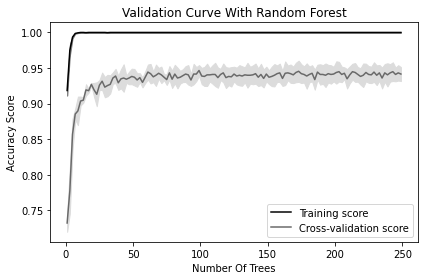

In [24]:
# 11.13 Visualizing the Effect of Hyperparameter Values

from sklearn.model_selection import validation_curve

features = digits.data
target = digits.target
param_range = np.arange(1, 250, 2)

train_scores, test_scores = validation_curve(
                                    # Classifier
                                    RandomForestClassifier(),
                                    # Feature matrix
                                    features,
                                    # Target vector
                                    target,
                                    # Hyperparameter to examine
                                    param_name="n_estimators",
                                    # Range of hyperparameter's values
                                    param_range=param_range,
                                    # Number of folds
                                    cv=3,
                                    # Performance metric
                                    scoring="accuracy",
                                    # Use all computer cores
                                    n_jobs=-1)
# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)
# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")
# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std,
train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std,
test_mean + test_std, color="gainsboro")
# Create plot
plt.title("Validation Curve With Random Forest")
plt.xlabel("Number Of Trees")
plt.ylabel("Accuracy Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()